In [9]:
!git clone https://github.com/UCSD-AI4H/COVID-CT.git

fatal: destination path 'COVID-CT' already exists and is not an empty directory.


In [ ]:
## unzip archives  q - quite, n - don't overwrite
!unzip -q -n '/content/COVID-CT/Images-processed/CT_COVID.zip'
!unzip -q -n '/content/COVID-CT/Images-processed/CT_NonCOVID.zip'

In [ ]:
import os
path='/content/CT_COVID/'
for count, filename in enumerate(os.listdir(path)): 
    dst ="covid-" + str(count) + ".png"
    src =path+ filename 
    dst =path+ dst 
        
    # rename() function will 
    # rename all the files 
    os.rename(src, dst)
print("Covid Positive cases: ", count)

path='/content/CT_NonCOVID/'
for count, filename in enumerate(os.listdir(path)): 
    dst ="noncovid-" + str(count) + ".png"
    src =path+ filename 
    dst =path+ dst 
        
    # rename() function will 
    # rename all the files 
    os.rename(src, dst)

print("Covid Negative cases: ", count)

Covid Positive cases:  348
Covid Negative cases:  396


## Exercise
We have downlaoded the COVID Image Data for you. Now, please a train and build a classification model to detect COVID vs Non-Covid cases. 

In [ ]:
from keras import layers 
from keras import models
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# New base directory
original_dataset_covid_dir = '/content/CT_COVID'
original_dataset_nocovid_dir = '/content/CT_NonCOVID'
base_dir = '/content/Covid'
os.mkdir(base_dir)

In [12]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_covid_dir = os.path.join(train_dir, 'covid')
os.mkdir(train_covid_dir)

train_nocovid_dir = os.path.join(train_dir, 'nocovid')
os.mkdir(train_nocovid_dir)

validation_covid_dir = os.path.join(validation_dir, 'covid')
os.mkdir(validation_covid_dir)

validation_nocovid_dir = os.path.join(validation_dir, 'nocovid')
os.mkdir(validation_nocovid_dir)

test_covid_dir = os.path.join(test_dir, 'covid')
os.mkdir(test_covid_dir)

test_nocovid_dir = os.path.join(test_dir, 'nocovid')
os.mkdir(test_nocovid_dir)

In [27]:
import shutil
fnames = ['covid-{}.png'.format(i) for i in range(230)]
for fname in fnames:
    src = os.path.join(original_dataset_covid_dir, fname)
    dst = os.path.join(train_covid_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['covid-{}.png'.format(i) for i in range(230, 300)]
for fname in fnames:
    src = os.path.join(original_dataset_covid_dir, fname)
    dst = os.path.join(validation_covid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['covid-{}.png'.format(i) for i in range(300, 349)]
for fname in fnames:
    src = os.path.join(original_dataset_covid_dir, fname)
    dst = os.path.join(test_covid_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['noncovid-{}.png'.format(i) for i in range(230)]
for fname in fnames:
    src = os.path.join(original_dataset_nocovid_dir, fname)
    dst = os.path.join(train_nocovid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid-{}.png'.format(i) for i in range(230, 300)]
for fname in fnames:
    src = os.path.join(original_dataset_nocovid_dir, fname)
    dst = os.path.join(validation_nocovid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid-{}.png'.format(i) for i in range(300, 397)]
for fname in fnames:
    src = os.path.join(original_dataset_nocovid_dir, fname)
    dst = os.path.join(test_nocovid_dir, fname)
    shutil.copyfile(src, dst)

In [28]:
print('total training covid images:', len(os.listdir(train_covid_dir)))
print('total training nocovid images:', len(os.listdir(train_nocovid_dir)))
print('total validation covid images:', len(os.listdir(validation_covid_dir)))

print('total validation nocovid images:', len(os.listdir(validation_nocovid_dir)))
print('total test covid images:', len(os.listdir(test_covid_dir)))
print('total test nocovid images:', len(os.listdir(test_nocovid_dir)))

total training covid images: 230
total training nocovid images: 230
total validation covid images: 100
total validation nocovid images: 100
total test covid images: 99
total test nocovid images: 147


In [43]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

In [47]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [48]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 460 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [49]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=20,
                              epochs=40,
                              validation_data=validation_generator,
                              validation_steps=10)

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


20/20 [==============================] - 4s 148ms/step - loss: 0.6922 - acc: 0.5350 - val_loss: 0.7189 - val_acc: 0.5000
Epoch 2/40
20/20 [==============================] - 3s 136ms/step - loss: 0.6789 - acc: 0.5750 - val_loss: 0.6546 - val_acc: 0.6200
Epoch 3/40
20/20 [==============================] - 3s 139ms/step - loss: 0.6611 - acc: 0.5750 - val_loss: 0.6338 - val_acc: 0.6700
Epoch 4/40
20/20 [==============================] - 3s 134ms/step - loss: 0.6424 - acc: 0.6450 - val_loss: 0.6156 - val_acc: 0.6500
Epoch 5/40
20/20 [==============================] - 3s 136ms/step - loss: 0.6361 - acc: 0.6250 - val_loss: 0.6208 - val_acc: 0.6050
Epoch 6/40
20/20 [==============================] - 3s 139ms/step - loss: 0.6286 - acc: 0.6425 - val_loss: 0.5796 - val_acc: 0.7000
Epoch 7/40
20/20 [==============================] - 3s 139ms/step - loss: 0.5925 - acc: 0.6675 - val_loss: 0.5802 - val_acc: 0.6700
Epoch 8/40
20/20 [==============================] - 3s 134ms/step - loss: 0.5878 - acc:

INFO:tensorflow:Assets written to: covid_noncovid/assets


INFO:tensorflow:Assets written to: covid_noncovid/assets


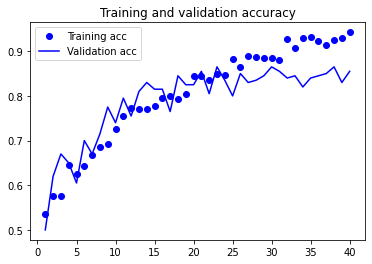

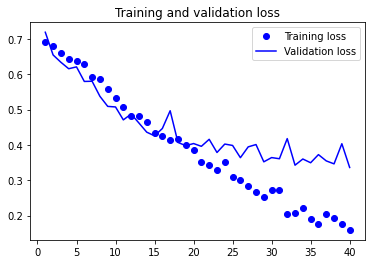

In [55]:
model.save('covid_noncovid')


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()